In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import roc_curve, auc


import warnings
warnings.filterwarnings(action = 'ignore')

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from matplotlib.legend_handler import HandlerLine2D

from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix , f1_score , accuracy_score , classification_report , log_loss
from sklearn.model_selection import cross_val_score


In [2]:
df = pd.read_csv('Preprocessed_01.csv')
X = df.drop('Target_Flag', axis = 1)
y = df['Target_Flag']

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=df.columns[:-1])
X_train,X_test, y_train,y_test = train_test_split(X,y, random_state=100)

In [4]:
test = pd.read_csv('Preprocessed_validation.csv')

In [ ]:
test['N_PosBkt_L3m_3.0'] = 

In [45]:
test = scaler.transform(test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Total_Field_Trails_6.0
Feature names seen at fit time, yet now missing:
- N_PosBkt_L3m_3.0


In [44]:
test.head()

,Max_Utilization,Max_Perc_Def_Chg_Pending,Max_Ratio_OC_Pending_POS,Perc_Paymode_Online,Perc_Repay_Fail,Birth_Year,Max_DPD_L3m,Perc_Paymode_Cheq_Fail,Age,N_Enq_L9m,...,Ever_Default_L12M_1,Total_Field_Trails_1.0,Total_Field_Trails_2.0,Total_Field_Trails_3.0,Total_Field_Trails_4.0,Total_Field_Trails_5.0,Total_Field_Trails_6.0,Total_Resolved_1.0,Total_Resolved_2.0,Total_Resolved_3.0
0,57,100.0,0.0,0.142857,0.285714,1990,2.0,0.5,33,0,...,1,0,0,0,0,0,0,0,0,0
1,100,100.0,0.0,0.000000,0.250000,1971,14.0,0.5,52,0,...,1,0,0,0,0,0,0,0,0,0
2,100,100.0,0.0,0.500000,0.500000,1999,8.0,1.0,24,2,...,1,0,0,0,0,0,0,0,1,0
3,100,0.0,0.0,0.000000,0.000000,1994,0.0,0.0,29,3,...,0,0,0,0,0,0,0,0,0,0
4,100,100.0,0.0,0.333333,0.333333,1999,19.0,0.5,24,0,...,1,0,0,0,0,0,0,0,0,0


In [41]:
X.drop(columns='Target_Flag', inplace=True)

In [18]:
X_train.drop(columns='Target_Flag', inplace=True)

In [20]:
X_test.drop(columns='Target_Flag', inplace=True)

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30061 entries, 0 to 30060
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Max_Utilization           30061 non-null  int64  
 1   Max_Perc_Def_Chg_Pending  30061 non-null  float64
 2   Max_Ratio_OC_Pending_POS  30061 non-null  float64
 3   Perc_Paymode_Online       30061 non-null  float64
 4   Perc_Repay_Fail           30061 non-null  float64
 5   Birth_Year                30061 non-null  int64  
 6   Max_DPD_L3m               29943 non-null  float64
 7   Perc_Paymode_Cheq_Fail    30061 non-null  float64
 8   Age                       30061 non-null  int64  
 9   N_Enq_L9m                 30061 non-null  int64  
 10  Max_Loan_Balance_Others   30061 non-null  float64
 11  N_WorkEx_Yr               30061 non-null  int64  
 12  N_Default_L3m_1           30061 non-null  int64  
 13  N_Default_L3m_2           30061 non-null  int64  
 14  N_Defa

In [11]:
def evaluate_model(model, class_balance, X_test, y_test):
    
    model_acc = model.score(X_test, y_test)
    print("Accuracy ({}): {:.2f}%".format(class_balance, model_acc * 100))
    
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    clr = classification_report(y_test, y_pred)
    
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='g', vmin=0, cbar=False, cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    
    print("Classification Report:\n----------------------\n", clr)

In [12]:
def get_roc_auc(y_test, predicted_proba):
    fpr, tpr, _ = roc_curve(y_test, predicted_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(4, 3))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

In [21]:
knn = LogisticRegression(random_state=42, class_weight={0: 1, 1: 7.5})
model = knn.fit(X_train, y_train)


y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)
y_proba =knn.predict_proba(X_test)




In [22]:

custom_threshold = 0.5
y_custom_pred = (y_proba >= custom_threshold).astype(int)

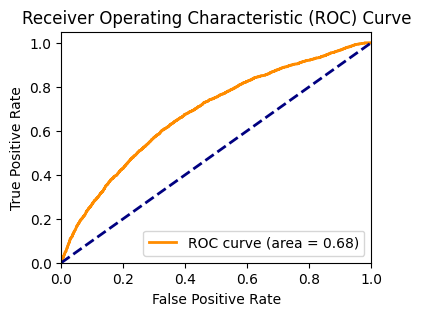

In [23]:
get_roc_auc(y_test, y_proba[:,1])

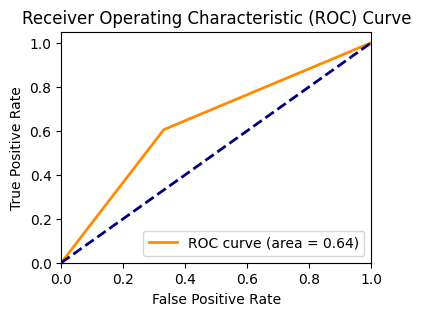

In [24]:
get_roc_auc(y_test, y_custom_pred[:,1])

In [25]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight={0: 1, 1: 7.5},
                                          random_state=42),
             n_jobs=-1, param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='roc_auc')

In [26]:
best_params = grid_search.best_params_


In [27]:
best_params

{'C': 10}

In [28]:
best_rf_classifier = LogisticRegression(random_state = 42, **best_params)
best_rf_classifier.fit(X_train, y_train)


LogisticRegression(C=10, random_state=42)

In [29]:
y_proba = best_rf_classifier.predict_proba(X_test)

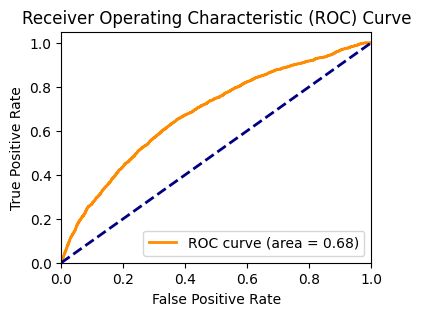

In [30]:
get_roc_auc(y_test, y_proba[:,1])

In [31]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Instantiate the RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Resample the dataset
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Check the class distribution after undersampling
print("Class distribution after undersampling:", Counter(y_resampled))

Class distribution after undersampling: Counter({0: 7309, 1: 7309})


In [32]:
knn = LogisticRegression(random_state=42, class_weight={0: 1, 1: 1})
model = knn.fit(X_resampled, y_resampled)


y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)
y_proba =knn.predict_proba(X_test)


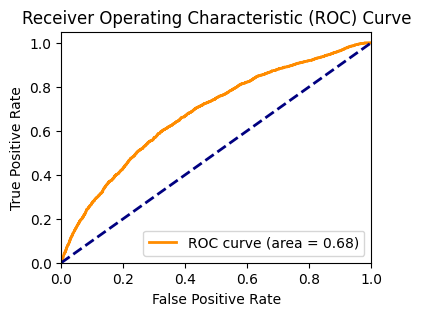

In [33]:
get_roc_auc(y_test, y_proba[:,1])

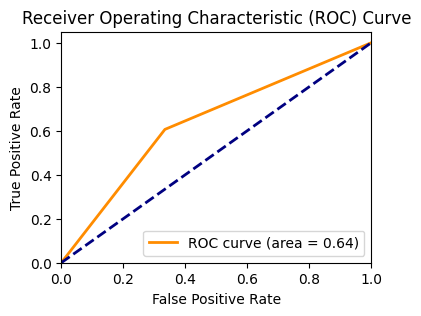

In [34]:
get_roc_auc(y_test, y_pred)

In [35]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Instantiate the RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Resample the dataset
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Check the class distribution after oversampling
print("Class distribution after oversampling:", Counter(y_resampled))


Class distribution after oversampling: Counter({0: 53615, 1: 53615})


In [36]:
knn = LogisticRegression(random_state=42, class_weight={0: 1, 1: 1})
model = knn.fit(X_resampled, y_resampled)


y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)
y_proba =knn.predict_proba(X_test)


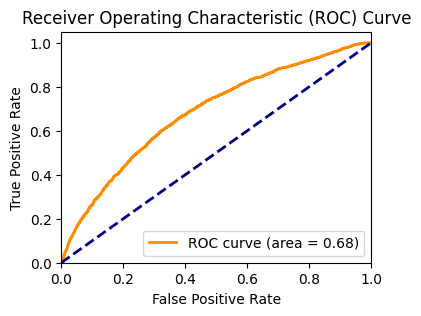

In [37]:
get_roc_auc(y_test, y_proba[:,1])

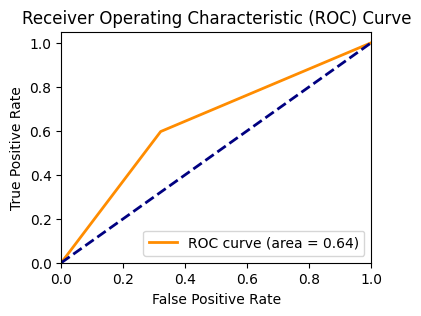

In [38]:
get_roc_auc(y_test, y_pred)

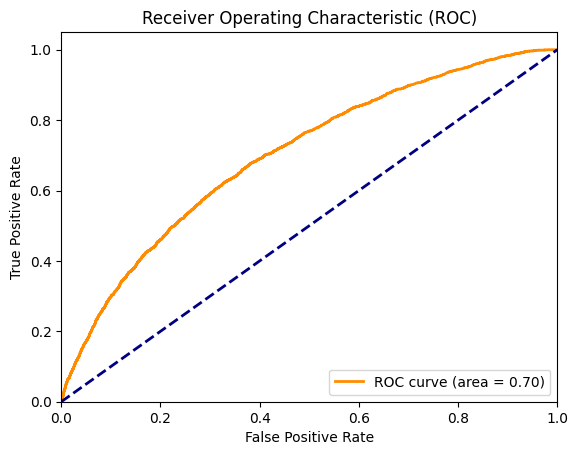

Adjusted AUC: 0.6477150351810435


In [40]:
# Create an XGBoost classifier

params = {
     'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'learning_rate': 0.05,
    'max_depth': 8,
    'n_estimators': 50,
    'random_state': 42
}

clf = XGBClassifier(**params)

# Train the classifier
clf.fit(X_train, y_train)

# Predict probabilities on the test data
y_prob = clf.predict_proba(X_test)[:, 1]

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Adjust the threshold to maximize AUC
best_threshold = thresholds[np.argmax(tpr - fpr)]
y_pred_adjusted = (y_prob >= best_threshold).astype(int)

# Calculate the adjusted AUC
roc_auc_adjusted = roc_auc_score(y_test, y_pred_adjusted)
print(f"Adjusted AUC: {roc_auc_adjusted}")

In [29]:
param_grid = {
    'objective': ['binary:logistic'],
    'eval_metric': ['logloss'],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7],
    'n_estimators': [50, 100, 150, 200],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 1, 2, 3],
    'min_child_weight': [1, 2, 3, 4]
}
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
# Create an XGBoost classifier
clf = XGBClassifier(random_state=42)

# Define a custom scoring function for RandomizedSearchCV based on AUC
auc_scorer = make_scorer(roc_auc_score, greater_is_better=True)

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    clf,
    param_distributions=param_grid,
    n_iter=50,  # Adjust the number of iterations as needed
    scoring=auc_scorer,
    cv=5,  # Use cross-validation for evaluation
    n_jobs=-1,  # Use all available CPU cores
    verbose=1,
    random_state=42
)

# Fit the randomized search to the training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding AUC score
print("Best Hyperparameters:", random_search.best_params_)
print("Best AUC Score:", random_search.best_score_)

# Evaluate the best model on the test data
best_model = random_search.best_estimator_
y_pred = best_model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_pred)
print("AUC Score on Test Data:", auc_score)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters: {'subsample': 0.7, 'objective': 'binary:logistic', 'n_estimators': 200, 'min_child_weight': 4, 'max_depth': 7, 'learning_rate': 0.3, 'gamma': 0, 'eval_metric': 'logloss', 'colsample_bytree': 0.8}
Best AUC Score: 0.5225565931180457
AUC Score on Test Data: 0.6508187206042202


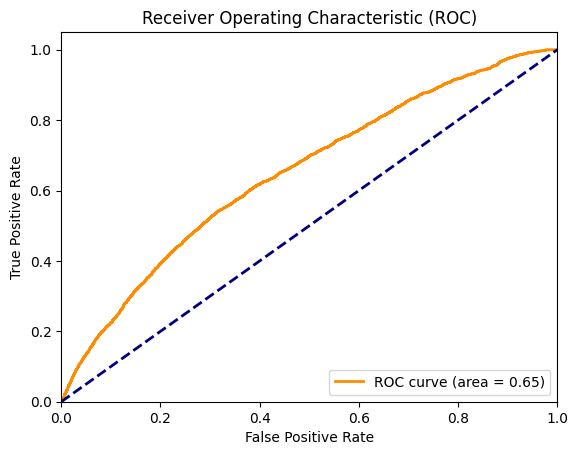

Adjusted AUC: 0.6129213202330417


In [30]:
# Create an XGBoost classifier

params = {
    'subsample': 0.7, 'objective': 'binary:logistic', 'n_estimators': 200, 
    'min_child_weight': 4, 'max_depth': 7, 'learning_rate': 0.3,
      'gamma': 0, 'eval_metric': 'logloss', 'colsample_bytree': 0.8
}

clf = XGBClassifier(**params)

# Train the classifier
clf.fit(X_train, y_train)

# Predict probabilities on the test data
y_prob = clf.predict_proba(X_test)[:, 1]

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Adjust the threshold to maximize AUC
best_threshold = thresholds[np.argmax(tpr - fpr)]
y_pred_adjusted = (y_prob >= best_threshold).astype(int)

# Calculate the adjusted AUC
roc_auc_adjusted = roc_auc_score(y_test, y_pred_adjusted)
print(f"Adjusted AUC: {roc_auc_adjusted}")

In [32]:
# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'objective': ['binary:logistic'],
    'eval_metric': ['logloss'],
    'learning_rate': np.linspace(0.01, 0.3, 10),
    'max_depth': range(3, 8),
    'n_estimators': [50, 100, 150, 200],
    'subsample': np.linspace(0.7, 1.0, 10),
    'colsample_bytree': np.linspace(0.7, 1.0, 10),
    'gamma': [0, 1, 2, 3],
    'min_child_weight': [1, 2, 3, 4]
}

# Create an XGBoost classifier
clf = XGBClassifier(random_state=42)

# Define a custom scoring function for RandomizedSearchCV based on AUC
auc_scorer = make_scorer(roc_auc_score, greater_is_better=True)

# Create a stratified K-Fold cross-validator for better cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    clf,
    param_distributions=param_dist,
    n_iter=100,  # Adjust the number of iterations as needed
    scoring=auc_scorer,
    cv=cv,  # Use stratified K-Fold cross-validation
    n_jobs=-1,  # Use all available CPU cores
    verbose=1,
    random_state=42
)

# Fit the randomized search to the scaled training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding AUC score
print("Best Hyperparameters:", random_search.best_params_)
print("Best AUC Score:", random_search.best_score_)

# Evaluate the best model on the scaled test data
best_model = random_search.best_estimator_
y_pred = best_model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_pred)
print("AUC Score on Test Data:", auc_score)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters: {'subsample': 0.7333333333333333, 'objective': 'binary:logistic', 'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 7, 'learning_rate': 0.3, 'gamma': 1, 'eval_metric': 'logloss', 'colsample_bytree': 0.9333333333333333}
Best AUC Score: 0.5201671679276402
AUC Score on Test Data: 0.6708252799125051


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters: {'subsample': 0.7333333333333333, 'objective': 'binary:logistic', 'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 7, 'learning_rate': 0.3, 'gamma': 1, 'eval_metric': 'logloss', 'colsample_bytree': 0.9333333333333333}
Best AUC Score: 0.5201671679276402
AUC Score on Test Data: 0.6708252799125051

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters: {'subsample': 0.7, 'objective': 'binary:logistic', 'n_estimators': 200, 'min_child_weight': 4, 'max_depth': 7, 'learning_rate': 0.3, 'gamma': 0, 'eval_metric': 'logloss', 'colsample_bytree': 0.8}
Best AUC Score: 0.5225565931180457
AUC Score on Test Data: 0.6508187206042202

    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'learning_rate': 0.3,
    'max_depth': 7,
    'n_estimators': 200,
    'random_state': 42

In [55]:
class_distribution = len(y_train) / (2 * np.bincount(y_train))
scale_pos_weight = class_distribution[0] / class_distribution[1]


In [57]:
scale_pos_weight

0.13632378998414624

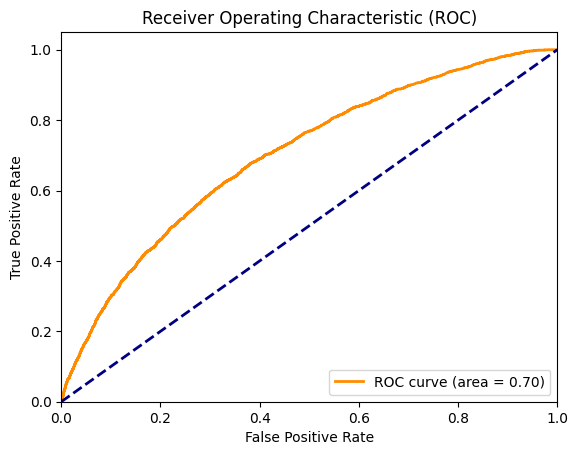

Adjusted AUC: 0.6477150351810435


In [42]:
# Create an XGBoost classifier

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'learning_rate': 0.05,
    'max_depth': 8,
    'n_estimators': 50,
    'random_state': 42,

}





clf = XGBClassifier(**params)

# Train the classifier
clf.fit(X_train, y_train)

# Predict probabilities on the test data
y_prob = clf.predict_proba(X_test)[:, 1]

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Adjust the threshold to maximize AUC
best_threshold = thresholds[np.argmax(tpr - fpr)]
y_pred_adjusted = (y_prob >= best_threshold).astype(int)

# Calculate the adjusted AUC
roc_auc_adjusted = roc_auc_score(y_test, y_pred_adjusted)
print(f"Adjusted AUC: {roc_auc_adjusted}")

In [59]:
best_threshold

0.11868216

In [63]:
import lightgbm as lgb

# Create a LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)

# Define hyperparameters and enable class imbalance handling
params = {
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'metric': 'auc',
    'is_unbalance': True,  # Enable class imbalance handling
    'learning_rate': 0.1,
    'num_leaves': 31,
    'max_depth': -1,
    'seed': 42
}

# Train the LightGBM model
bst = lgb.train(params, train_data, num_boost_round=100)


[LightGBM] [Info] Number of positive: 7309, number of negative: 53615
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005297 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1009
[LightGBM] [Info] Number of data points in the train set: 60924, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.119969 -> initscore=-1.992722
[LightGBM] [Info] Start training from score -1.992722


In [64]:
y = bst.predict(X_test)

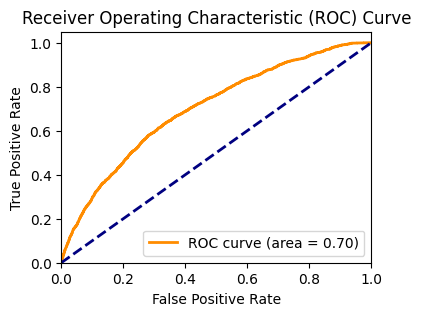

In [65]:
get_roc_auc(y_test, y)

In [69]:
from catboost import CatBoostClassifier

# Calculate class weights based on the class distribution
class_distribution = len(y_train) / (2 * np.bincount(y_train))
class_weights = [class_distribution[1], class_distribution[0]]

# Create a CatBoost classifier with class weights
clf = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=6,
    class_weights=class_weights,
    random_seed=42,
    verbose=0
)

# Train the classifier
clf.fit(X_train, y_train)

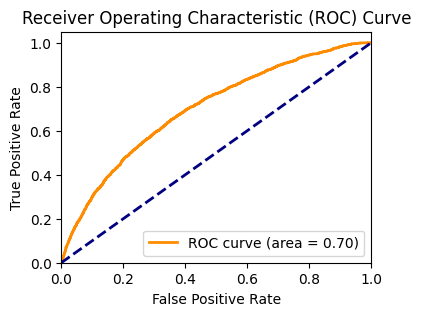

In [71]:
y = clf.predict_proba(X_test)
get_roc_auc(y_test, y[:,1])

In [72]:
param_grid = {
    'objective': ['binary'],
    'metric': ['binary_logloss'],
    'boosting_type': ['gbdt', 'dart', 'goss'],
    'learning_rate': [0.01, 0.1],
    'num_leaves': [ 40],
    'max_depth': [3,6, -1],
 


    'n_estimators': [50, 100, 200],
}

# Create the LightGBM classifier
clf = lgb.LGBMClassifier(random_state=42, n_jobs=-1)

# Create the GridSearchCV object
grid_search = GridSearchCV(
    clf,
    param_grid=param_grid,
    scoring='roc_auc',  # Use ROC AUC as the evaluation metric
    cv=5,  # Use cross-validation for evaluation
    n_jobs=-1,  # Use all available CPU cores
    verbose=1
)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding ROC AUC score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best ROC AUC Score:", grid_search.best_score_)

# Evaluate the best model on the test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score on Test Data:", roc_auc)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[LightGBM] [Info] Number of positive: 7309, number of negative: 53615
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017314 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1009
[LightGBM] [Info] Number of data points in the train set: 60924, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.119969 -> initscore=-1.992722
[LightGBM] [Info] Start training from score -1.992722
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Best Hyperparameters: {'boosting_type': 'dart', 'learning_rate': 0.1, 'max_depth': 6, 'metric': 'binary_logloss', 'n_estimators': 200, 'num_leaves': 40, 'objective': 'binary'}
Best ROC AUC Score: 0.7073523236788
ROC AUC Score on Test Data: 0.7018111057104129


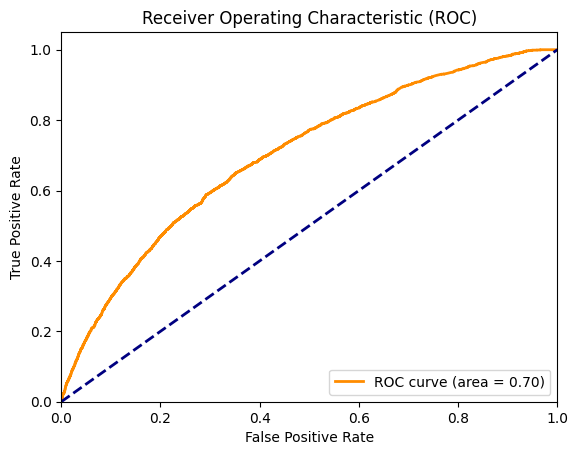

AUC Score: 0.7006965313183953


In [43]:
clf = GradientBoostingClassifier(
    n_estimators=100,  # Number of boosting stages (adjust as needed)
    learning_rate=0.1,  # Step size shrinkage
    max_depth=3,  # Maximum depth of individual trees
    random_state=42
)

# Train the classifier
clf.fit(X_train, y_train)

# Predict probabilities on the test data
y_prob = clf.predict_proba(X_test)[:, 1]

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Print the AUC score
print("AUC Score:", roc_auc_score(y_test, y_prob))




In [ ]:
clf = GradientBoostingClassifier(
    n_estimators=100,  # Number of boosting stages (adjust as needed)
    learning_rate=0.1,  # Step size shrinkage
    max_depth=3,  # Maximum depth of individual trees
    random_state=42
)

# Train the classifier
clf.fit(X, y)

# Predict probabilities on the test data
y_prob = clf.predict_proba()[:, 1]

In [73]:
import lightgbm as lgb

# Create a LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)

# Define hyperparameters and enable class imbalance handling
params = {
   'boosting_type': 'dart', 'learning_rate': 0.1, 'max_depth': 6, 'metric': 'binary_logloss', 'n_estimators': 200, 'num_leaves': 40, 'objective': 'binary'}

# Train the LightGBM model
bst = lgb.train(params, train_data, num_boost_round=100)


[LightGBM] [Info] Number of positive: 7309, number of negative: 53615
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003605 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1009
[LightGBM] [Info] Number of data points in the train set: 60924, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.119969 -> initscore=-1.992722
[LightGBM] [Info] Start training from score -1.992722
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


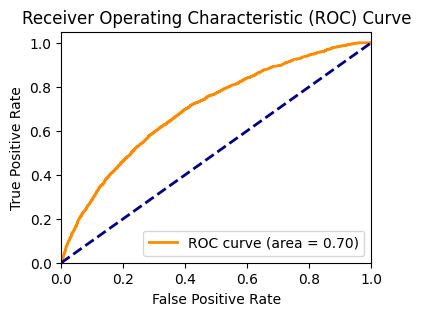

In [74]:
y = bst.predict(X_test)
get_roc_auc(y_test, y)

In [82]:
pd.reset_option('display.max_columns')


In [80]:
df.head()

,Max_Utilization,Max_Perc_Def_Chg_Pending,Max_Ratio_OC_Pending_POS,Perc_Paymode_Online,Perc_Repay_Fail,Birth_Year,Max_DPD_L3m,Perc_Paymode_Cheq_Fail,Age,N_Enq_L9m,...,N_PosBkt_L3m_3.0,Ever_Default_L12M_1,Total_Field_Trails_1.0,Total_Field_Trails_2.0,Total_Field_Trails_3.0,Total_Field_Trails_4.0,Total_Field_Trails_5.0,Total_Resolved_1.0,Total_Resolved_2.0,Total_Resolved_3.0
0,38,100.0,0.0,0.285714,0.428571,1977,19.0,0.750,46,0,...,0,1,0,0,0,0,0,0,0,0
1,68,100.0,0.0,0.000000,0.200000,1990,2.0,0.500,33,0,...,0,1,0,0,0,0,0,0,0,0
2,39,50.0,0.0,0.200000,0.200000,1995,25.0,1.000,28,1,...,0,1,0,0,0,0,0,0,0,0
3,76,0.0,0.0,0.000000,0.000000,1997,0.0,0.000,26,2,...,0,0,0,0,0,0,0,0,0,0
4,23,33.0,0.0,0.250000,0.250000,1995,19.0,0.375,28,1,...,0,1,0,0,0,0,0,0,0,0


In [104]:
X_train.columns

Index(['Max_Utilization', 'Max_Perc_Def_Chg_Pending',
       'Max_Ratio_OC_Pending_POS', 'Perc_Paymode_Online', 'Perc_Repay_Fail',
       'Birth_Year', 'Max_DPD_L3m', 'Perc_Paymode_Cheq_Fail', 'Age',
       'N_Enq_L9m', 'Max_Loan_Balance_Others', 'N_WorkEx_Yr', 'Target_Flag',
       'N_Default_L3m_1', 'N_Default_L3m_2', 'N_Default_L3m_3',
       'N_Family_Member_1', 'N_Family_Member_2', 'N_Family_Member_3',
       'N_Family_Member_4', 'N_Family_Member_5', 'N_Family_Member_6',
       'N_Family_Member_7', 'N_Family_Member_8', 'N_Family_Member_9',
       'N_Family_Member_10', 'N_Family_Member_11', 'N_PosBkt_L3m_1.0',
       'N_PosBkt_L3m_2.0', 'N_PosBkt_L3m_3.0', 'Ever_Default_L12M_1',
       'Total_Field_Trails_1.0', 'Total_Field_Trails_2.0',
       'Total_Field_Trails_3.0', 'Total_Field_Trails_4.0',
       'Total_Field_Trails_5.0', 'Total_Resolved_1.0', 'Total_Resolved_2.0'],
      dtype='object')

In [83]:
df1 = df.copy()

In [84]:
df1.columns

Index(['Max_Utilization', 'Max_Perc_Def_Chg_Pending',
       'Max_Ratio_OC_Pending_POS', 'Perc_Paymode_Online', 'Perc_Repay_Fail',
       'Birth_Year', 'Max_DPD_L3m', 'Perc_Paymode_Cheq_Fail', 'Age',
       'N_Enq_L9m', 'Max_Loan_Balance_Others', 'N_WorkEx_Yr', 'Target_Flag',
       'N_Default_L3m_1', 'N_Default_L3m_2', 'N_Default_L3m_3',
       'N_Family_Member_1', 'N_Family_Member_2', 'N_Family_Member_3',
       'N_Family_Member_4', 'N_Family_Member_5', 'N_Family_Member_6',
       'N_Family_Member_7', 'N_Family_Member_8', 'N_Family_Member_9',
       'N_Family_Member_10', 'N_Family_Member_11', 'N_PosBkt_L3m_1.0',
       'N_PosBkt_L3m_2.0', 'N_PosBkt_L3m_3.0', 'Ever_Default_L12M_1',
       'Total_Field_Trails_1.0', 'Total_Field_Trails_2.0',
       'Total_Field_Trails_3.0', 'Total_Field_Trails_4.0',
       'Total_Field_Trails_5.0', 'Total_Resolved_1.0', 'Total_Resolved_2.0',
       'Total_Resolved_3.0'],
      dtype='object')

In [96]:
df = pd.read_csv("Validation Data file.csv", index_col='Customer_No')

In [97]:
df.head()

,N_Default_L3m,Branch_Code,Max_Utilization,Max_Perc_Def_Chg_Pending,N_Family_Member,Max_Ratio_OC_Pending_POS,N_PosBkt_L3m,CoAp_Income,Ever_Default_L12M,Perc_Paymode_Online,Perc_Repay_Fail,Birth_Year,Max_DPD_L3m,Perc_Paymode_Cheq_Fail,Age,Total_Field_Trails,Total_Resolved,N_Enq_L9m,Max_Loan_Balance_Others,N_WorkEx_Yr
Customer_No,,,,,,,,,,,,,,,,,,,,
90000,2,22623,57,100.0,8,NaN,0.0,NaN,Yes,0.142857,0.285714,1990,2.0,0.5,33,NaN,NaN,0,8795.0,13
90001,1,61114,100,100.0,6,NaN,NaN,NaN,Yes,0.000000,0.250000,1971,14.0,0.5,52,NaN,NaN,0,13039.0,1
90002,2,12573,100,100.0,4,NaN,NaN,NaN,Yes,0.500000,0.500000,1999,8.0,1.0,24,0.0,2.0,2,24599.0,-4
90003,0,18210,100,NaN,7,NaN,NaN,NaN,No,0.000000,0.000000,1994,0.0,NaN,29,NaN,NaN,3,48750.0,9
90004,2,41174,100,100.0,1,NaN,NaN,NaN,Yes,0.333333,0.333333,1999,19.0,0.5,24,NaN,NaN,0,55384.0,4


In [98]:
df.drop(columns=['Branch_Code','CoAp_Income'], inplace=True)
df['Perc_Paymode_Cheq_Fail'].fillna(0.5, inplace=True)
df['Max_Perc_Def_Chg_Pending'].fillna(100.0, inplace=True)
df['N_PosBkt_L3m'].fillna(0.0, inplace=True)
df['Max_DPD_L3m'].fillna(0.0, inplace=True)
df['Max_Loan_Balance_Others'].fillna(0.0, inplace=True)
df['Total_Resolved'].fillna(0.0, inplace=True)
df['Total_Field_Trails'].fillna(0.0, inplace=True)
df['Max_Ratio_OC_Pending_POS'].fillna(0.0, inplace=True)

In [99]:
df.head()

,N_Default_L3m,Max_Utilization,Max_Perc_Def_Chg_Pending,N_Family_Member,Max_Ratio_OC_Pending_POS,N_PosBkt_L3m,Ever_Default_L12M,Perc_Paymode_Online,Perc_Repay_Fail,Birth_Year,Max_DPD_L3m,Perc_Paymode_Cheq_Fail,Age,Total_Field_Trails,Total_Resolved,N_Enq_L9m,Max_Loan_Balance_Others,N_WorkEx_Yr
Customer_No,,,,,,,,,,,,,,,,,,
90000,2,57,100.0,8,0.0,0.0,Yes,0.142857,0.285714,1990,2.0,0.5,33,0.0,0.0,0,8795.0,13
90001,1,100,100.0,6,0.0,0.0,Yes,0.000000,0.250000,1971,14.0,0.5,52,0.0,0.0,0,13039.0,1
90002,2,100,100.0,4,0.0,0.0,Yes,0.500000,0.500000,1999,8.0,1.0,24,0.0,2.0,2,24599.0,-4
90003,0,100,100.0,7,0.0,0.0,No,0.000000,0.000000,1994,0.0,0.5,29,0.0,0.0,3,48750.0,9
90004,2,100,100.0,1,0.0,0.0,Yes,0.333333,0.333333,1999,19.0,0.5,24,0.0,0.0,0,55384.0,4


In [100]:
df['Ever_Default_L12M'].replace({'Yes': 1, 'No':0}, inplace=True)

In [101]:
df = df.abs()

In [102]:
df.columns

Index(['N_Default_L3m', 'Max_Utilization', 'Max_Perc_Def_Chg_Pending',
       'N_Family_Member', 'Max_Ratio_OC_Pending_POS', 'N_PosBkt_L3m',
       'Ever_Default_L12M', 'Perc_Paymode_Online', 'Perc_Repay_Fail',
       'Birth_Year', 'Max_DPD_L3m', 'Perc_Paymode_Cheq_Fail', 'Age',
       'Total_Field_Trails', 'Total_Resolved', 'N_Enq_L9m',
       'Max_Loan_Balance_Others', 'N_WorkEx_Yr'],
      dtype='object')

In [ ]:
columns_to_encode = ['N_Default_L3m', 
       'N_Family_Member',  'N_PosBkt_L3m',
       'Ever_Default_L12M', 
       
       'Total_Field_Trails', 'Total_Resolved', 
       ]

# Use pd.get_dummies to create dummy variables
df_encoded = pd.get_dummies(df, columns=columns_to_encode)
